In [310]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import scipy.sparse as sps
import scipy.optimize as sco

# Polynome de degré 2

In [311]:
def f(x):
    return 0.1*x**2 + np.cos(x/2)-np.exp(-x/4) + 2.1

def g(x):
    return x**2 + 0.1

def h(x):
    return np.cos(x) + 2

fonctions_test = [f,g,h]

In [312]:
def a(x,f) :
    return np.sqrt(f(0)) * (1-x) - np.sqrt(f(1)) * x

def p2(x,a1,sqrtb0):
    return a1**2 + x*(1-x)*sqrtb0
    
def approx_p2(x,f):
    xstar = np.sqrt(f(0))/ (np.sqrt(f(0)) + np.sqrt(f(1)))
    interp = np.array([0,1,xstar])
    
    a1 = a(x,f)
    sqrtb0 =  f(xstar) / (xstar *(1-xstar) )  
    return p2(x,a1,sqrtb0), interp


In [313]:
def test_approx2(f):
    x = np.linspace(0,1,101)
    px, interp = approx_p2(x,f)
    fx = f(x)
    plt.plot(x,fx,label='f(x)')
    plt.plot(x,px,label='p2(x)')
    plt.plot(interp, f(interp),'ob')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    return px,fx

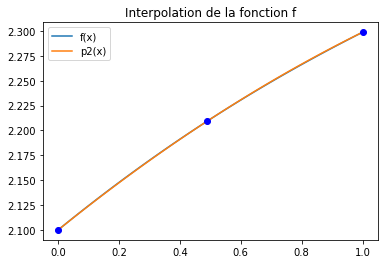

Norme 2 de l'erruer :  0.0025893052561467376
Norme inf de l'erreur :  0.0004046236121508784


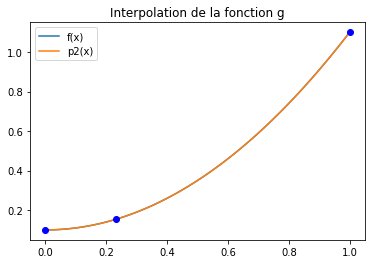

Norme 2 de l'erruer :  9.4623719602731e-16
Norme inf de l'erreur :  3.3306690738754696e-16


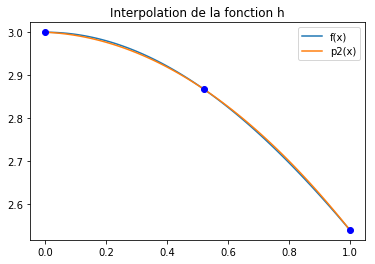

Norme 2 de l'erruer :  0.027257190435299193
Norme inf de l'erreur :  0.004026454146748293


In [314]:
for fonctions in fonctions_test : 
    px,fx = test_approx2(fonctions)
    print("Norme 2 de l'erruer : ",npl.norm(fx-px))
    print("Norme inf de l'erreur : ",npl.norm(fx-px,np.inf))

# Polynome de degré 3

In [315]:
def f(x):
    return 2*x**3 + x**2 + 2 

def g(x):
    return x**2 + 0.1

def h(x):
    return np.cos(x)

def k(x):
    return 3*x**4 + 2*x**3 + x**2 + 2 

fonctions_test = [f,g,h,k]

In [316]:
def phi(beta,f) : 
    return beta * np.sqrt((1-beta)*f(0)) / (np.sqrt((1-beta)*f(0)) + np.sqrt(f(beta))) 

def psi(alpha,f):
    return  (alpha * np.sqrt(alpha*f(1)) + np.sqrt(f(alpha)) ) / (np.sqrt(alpha*f(1)) + np.sqrt(f(alpha)))

def K(alpha, beta,f):
    phi_beta = phi(beta,f)
    psi_alpha = psi(alpha,f)
    return np.array([phi_beta, psi_alpha])

def T(alpha,f):
    return alpha - phi(psi(alpha,f),f)

In [317]:
def p3(x,a1,b1):
    return x * a1**2 + (1-x)* b1**2

def approx_p3(x,f):
    alpha = sco.newton(T,1/4,args=(f,))
    beta = psi(alpha,f)
    interp = np.array([0,1,alpha,beta])
    
    a1 = np.sqrt(f(1))* (x- alpha)/(1-alpha) - np.sqrt(f(alpha)/alpha) * (1-x)/(1-alpha)
    b1 = np.sqrt(f(beta)/(1-beta)) * x/beta - np.sqrt(f(0)) * (beta-x)/(beta)
    return p3(x,a1,b1), interp

In [318]:
def test_approx3(f):
    x = np.linspace(0,1,101)
    px, interp = approx_p3(x,f)
    fx = f(x)
    plt.plot(x,fx,label='f(x)')
    plt.plot(x,px,label='p3(x)')
    plt.plot(interp, f(interp),'ob')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    return px,fx

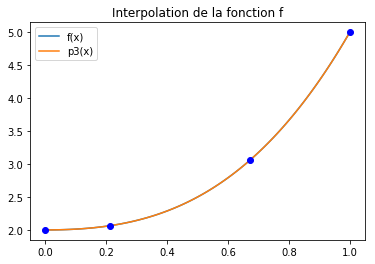

Norme 2 de l'erruer :  5.599751867943366e-15
Norme inf de l'erreur :  1.3322676295501878e-15


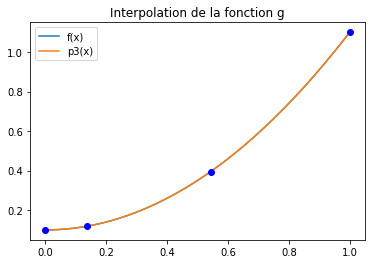

Norme 2 de l'erruer :  1.0753270844771355e-15
Norme inf de l'erreur :  4.440892098500626e-16


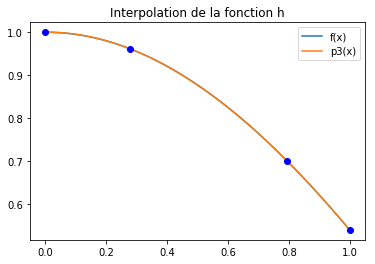

Norme 2 de l'erruer :  0.003458906263776177
Norme inf de l'erreur :  0.0005932715837815294


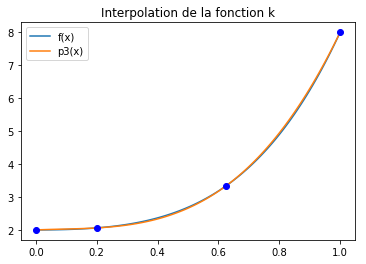

Norme 2 de l'erruer :  0.2888576255722688
Norme inf de l'erreur :  0.055868465529055555


In [319]:
for fonctions in fonctions_test : 
    px,fx = test_approx3(fonctions)
    print("Norme 2 de l'erruer : ",npl.norm(fx-px))
    print("Norme inf de l'erreur : ",npl.norm(fx-px,np.inf))

# Polynome de degré 3 avec $h$

In [320]:
def f(x,h):
    x = x*h
    return 2*x**3 + x**2 + 2 

def g(x,h):
    x = x*h
    return x**3 + 0.1

def h(x,h):
    x = x*h
    return np.cos(x)

fonctions_test = [f,g,h]

In [321]:
def phih(beta,f,h) : 
    return beta * np.sqrt((1-beta)*f(0,h)) / (np.sqrt((1-beta)*f(0,h)) + np.sqrt(f(beta,h))) 

def psih(alpha,f,h):
    return  (alpha * np.sqrt(alpha*f(1,h)) + np.sqrt(f(alpha,h)) ) / (np.sqrt(alpha*f(1,h)) + np.sqrt(f(alpha,h)))

def Kh(alpha, beta,f,h):
    phi_beta = phih(beta,f,h)
    psi_alpha = psih(alpha,f,h)
    return np.array([phi_beta, psi_alpha])

def Th(alpha,f,h):
    return alpha - phih(psih(alpha,f,h),f,h)

In [322]:
def p3h(x,a1,b1,h):
    return x * a1**2 + (1-x)* b1**2

def approx_p3h(x,f,h):
    alpha = sco.newton(Th,1/4,args=(f,h,))
    beta = psih(alpha,f,h)
    interp = np.array([0,1,alpha,beta]) 
    
    a1 = np.sqrt(f(1,h)) * (x - alpha)/(1-alpha) - np.sqrt(f(alpha,h)/alpha) * (1-x)/(1-alpha)
    b1 = np.sqrt(f(beta,h)/(1-beta)) * x/beta - np.sqrt(f(0,h)) * (beta-x)/(beta)
    return p3h(x,a1,b1,h), interp

In [323]:
def test_approx3h(f,h):
    x = np.linspace(0,1,101)
    px, interp = approx_p3h(x,f,h)
    fx = f(x,h)
    plt.plot(x,fx,label='f(x)')
    plt.plot(x,px,label='p(x)')
    plt.plot(interp, f(interp,h),'ob')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    return px,fx

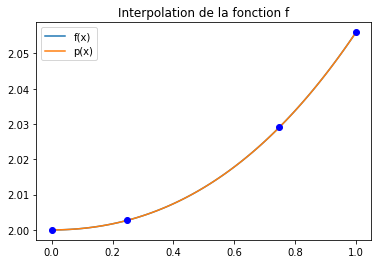

Norme 2 de l'erruer :  5.004631229248277e-15
Norme inf de l'erreur :  8.881784197001252e-16


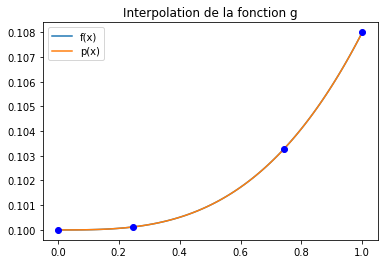

Norme 2 de l'erruer :  2.5514002453611344e-16
Norme inf de l'erreur :  6.938893903907228e-17


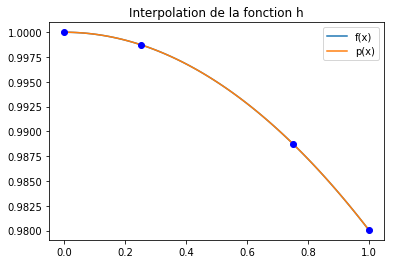

Norme 2 de l'erruer :  5.963123334928927e-06
Norme inf de l'erreur :  1.03858948985458e-06


In [324]:
h = 0.2
for fonctions in fonctions_test : 
    px,fx = test_approx3h(fonctions,h)
    print("Norme 2 de l'erruer : ",npl.norm(fx-px))
    print("Norme inf de l'erreur : ",npl.norm(fx-px,np.inf))

# Polynome de degré $n = 2p + 1$ 

## Operateur S

In [325]:
def S (p,eps,X0):
    # séparation en alpha et beta
    alpha = X0[:p]
    beta = X0[p:]

    # creation des delta pour alpha et beta
    delta_alpha = np.concatenate((alpha,[1]))
    delta_alpha[1:] -= alpha
    
    delta_beta = - np.concatenate(([0],beta))
    delta_beta[:-1] += beta
    delta_beta[-1] += 1 
    
    # creation des delta_tilde pour alpha et beta
    delta_alpha_t = np.zeros(p+1)
    delta_beta_t = np.zeros(p+1)
    for i in range (p+1):
        delta_alpha_t[i] = max(delta_alpha[i],2*eps)
        delta_beta_t[i] = max(delta_beta[i],2*eps)

    delta_alpha_t = delta_alpha_t / np.sum(delta_alpha_t)
    delta_beta_t = delta_beta_t / np.sum(delta_beta_t)

    # mise a jour des alpha et beta, directement dans x
    X = np.zeros(2*p)
    X[0] = delta_alpha_t[0]
    X[p] = delta_beta_t[0]
    for i in range (1,p):
        X[i] = X[i-1] + delta_alpha_t[i]
        X[i+p] = X[i-1+p] + delta_beta_t[i]
    
    return X

In [326]:
def test_S(a):
    print(a)
    Speps = S(4,0.1,a)
    print(Speps)

    plt.plot(Speps[:4],np.ones(4),'or')
    plt.plot(Speps[4:],np.ones(4),'ob')

[0.1, 0.35, 0.5, 0.8, 0.07, 0.39, 0.65, 0.85]
[0.17391304 0.39130435 0.56521739 0.82608696 0.16949153 0.44067797
 0.66101695 0.83050847]


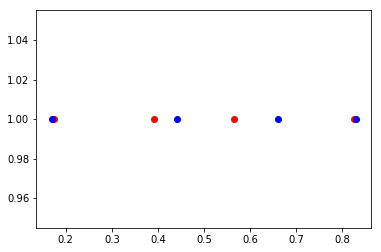

In [327]:
a = [0.1,0.35,0.5,0.8,0.07,0.39,0.65,0.85]
test_S(a)

# Initialisation

In [328]:
def init_X(p):
    i = np.linspace(0,p,p+1)
    X = np.zeros(2*(p+1))
    X[:p+1] = 1/2*(1-np.cos((2*i+1)*np.pi/(2*p+1)))
    X[p+1:] = 1/2*(1-np.cos(2*i*np.pi/(2*p+1)))
    return X

In [329]:
def test_init(p):
    X = init_X(p)
    plt.plot(X[:p+1],np.ones(len(X[:p+1])),'ob')
    plt.plot(X[p+1:],np.ones(len(X[p+1:])),'or')

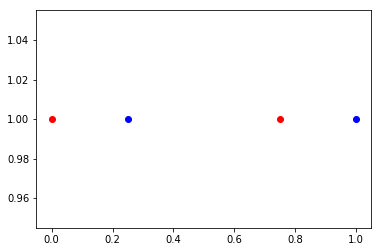

In [330]:
p = 1
test_init(p)

# Algorithme

In [349]:
def f(x,h):
    x = x*h
    return 2*x**3 + x**2 + 2 

def g(x,h):
    x = x*h
    return x**3 + 2

def h(x,h):
    x = x*h
    return np.cos(x)

def k(x,h):
    x = x*h
    return x + 1
fonctions_test = [f,g,h,k]

In [350]:
def Jp(p,f,h,X,epsilon):
    i = np.linspace(0,p-1,p)
    theta_i = 2*(p-i)*np.pi/(2*p+1)
    D_alpha = 2*p*np.cos(p*theta_i)/(np.cos(theta_i)-1) + np.sin(p*theta_i)/np.sin(theta_i) * 2 * (p - 1/(np.cos(theta_i)-1))
    
    i = np.linspace(1,p,p)
    eta_i = (2*(p-i)+1)*np.pi/(2*p+1)
    D_beta = 2*p*np.cos(p*eta_i)/(np.cos(eta_i)+1) + np.sin(p*eta_i)/np.sin(eta_i) * 2* (p + 1/(np.cos(eta_i)+1))

    feps = max( np.max(f(X,h)),epsilon)
    return  np.sqrt(feps) * sps.diags(np.concatenate((D_alpha,D_beta))).toarray()

def b_beta (p,f,h,beta,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(beta[i],h),epsilon)/(1-beta[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - beta[j])/(beta[i]-beta[j])
        somme *= pro
        res  += somme
    return res
  

def a_alpha (p,f,h,alpha,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(alpha[i],h),epsilon)/(alpha[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - alpha[j])/(alpha[i]-alpha[j])
        somme *= pro
        res += somme
    return res
     
def f_theta(X,p,f,h,espilon):
    alpha = X[:p]
    alpha_1 = np.concatenate((alpha,[1]))
    beta = X[p:]
    beta_0 = np.concatenate(([0],beta))
    return np.concatenate(( b_beta(p,f,h,beta_0,alpha,epsilon), a_alpha(p,f,h,alpha_1,beta,epsilon) ))

In [351]:
def Newton_Raphson (p,f,h,epsi,epsilon,eps=1e-12,itermax=100):
    X = init_X(p) 
    X = np.concatenate((X[:p],X[p+2:]))
    k=0
    err=2*eps
    Residus = []
    while err > eps and itermax > k :
        X0 = np.copy(X)
        #print(f_theta(X,p,f,h,epsilon))
        d = npl.solve(Jp(p,f,h,X,epsilon),f_theta(X,p,f,h,epsilon))
        X = X - d
        X = S(p,epsi,X)
        #print(f_theta(X,p,f,h,epsilon))
        k+=1
        err = npl.norm(X-X0)/npl.norm(X0)
        Residus += [err]
    #print(k)
    return X,k,Residus


In [352]:
def epsi_S(p):
    i = np.linspace(0,2*p+1,2*p+2)
    gamma = 1/2*(1-np.cos(i*np.pi/(2*p+1)))
    return min( 1/2/(p+1), np.min((gamma[1:]-gamma[:-1])/3))

def pn(x,ap,bp): 
    return x * ap**2 + (1-x) * bp**2
    
def approxh(x,p,f,h,epsilon):
    epsi = epsi_S(p)
    #X = sco.fsolve(f_theta,np.array([1/4,3/4]), args=(p,f,h,epsilon))
    #X = S(p,epsi,X)
    X,itermax,residus = Newton_Raphson(p,f,h,epsi,epsilon)
    print("ftheta :",f_theta(X,p,f,h,epsilon))
    X  = np.concatenate(( X[:p],[1],[0],X[p:]))

    ap = a_alpha(p,f,h,X[:p+1],x,epsilon)
    bp = b_beta(p,f,h,X[p+1:],x,epsilon)
    
    return pn(x,ap,bp),X

In [353]:
def test_approx(p,f,h,espilon):
    x = np.linspace(0,1,101)
    px, interp = approxh(x,p,f,h,epsilon)
    #
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    '''
    print(Ap)
    print((-1)**p * np.sqrt(f(interp[3],h)/(1-interp[3])))
    print("Bp",Bp)
    print(pn(interp,Ap,Bp))
    '''
    #
    fx = f(x,h) 
    plt.plot(x,fx,label="f(x)")
    plt.plot(x,px,label="p(x)")
    plt.plot(interp,f(interp,h),'ob')
    plt.plot(interp, pn(interp,Ap,Bp),'or')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    
    return px,fx

ftheta : [-2.89768209e-14  8.88178420e-16]


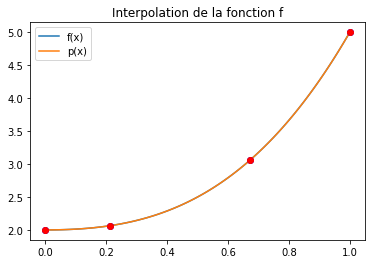

ftheta : [-1.69864123e-14  2.22044605e-16]


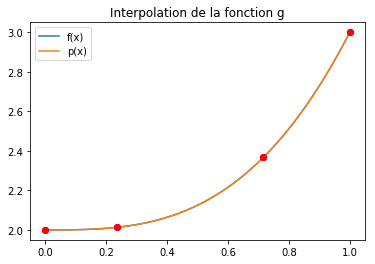

ftheta : [-3.56381591e-14 -1.68753900e-14]


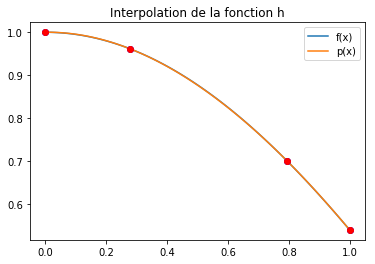

ftheta : [6.19504448e-14 1.82409643e-13]


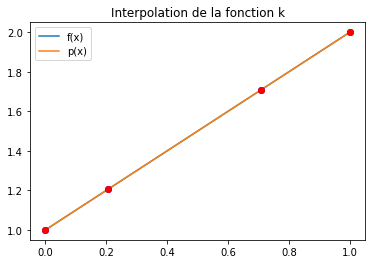

In [354]:
h = 1
p = 1
epsilon=0.001

for fonctions in fonctions_test : 
    test_approx(p,fonctions,h,epsilon)

--------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [355]:
def f(x,h):
    x = x*h
    return 2*x**17 + x**10 - x**2 + 2 # - 1.85

def g(x,h):
    x = x*h
    return 0.5 + np.abs(x - 0.5) #- 0.75

def t(x,h):
    if h == 1 :
        h = 9/10
    x = x*h
    return 1/(1-x) #-1.5

def j(x,h):
    x = x*h
    return 1/ ( 1 + 25*(2*x-1)**2 ) #- 1

def k(x,h):
    x = x*h
    return 10**5 * x**10 * (1-x)**7 + 0.01

def q(x,h):
    x = x*h
    return 10 * (x-1/2)**4 #+ 0.01

def creneau(x,h):
    x = x*h
    return (x<1/4)*0 + (x>3/4)*0 + (1/4<=x)*1 + (x<=3/4)*1

def sinoffset(x,h):
    x = x*h
    return np.sin(x)+1.2

def gaussienne(x,h):
    x = x*h
    m = 1/2
    sigma = 1/10
    return np.exp(-(x-m)**2/2/sigma**2) / (2*np.pi)/sigma

fonctions_test = [f,g,t,j,k,q,creneau,sinoffset,gaussienne]

ftheta : [-5.27355937e-16  5.10702591e-15 -7.27196081e-14  2.79443135e-13
  2.62905253e-11 -9.74220704e-15  3.91076060e-14 -2.54130050e-13
 -1.45494727e-13  3.64153152e-14]


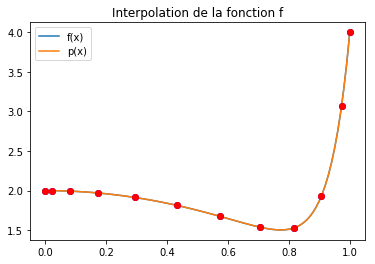

Norme de l'erreur :  n2 = 0.00064555393853887  ; ninf =  0.00010806598192703021 

ftheta : [-2.27248775e-15 -8.32667268e-17 -7.61418706e-13 -1.37556633e-12
  7.41628980e-14 -7.23032745e-14  1.37574674e-12  7.61640750e-13
 -1.38777878e-16  2.66453526e-15]


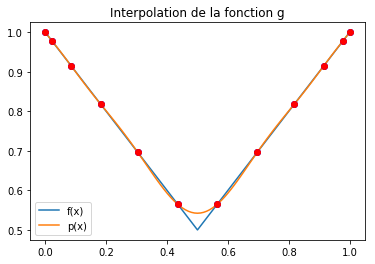

Norme de l'erreur :  n2 = 0.08293481819915345  ; ninf =  0.04224839588061169 

ftheta : [ 2.80337351e-11 -3.00970082e-11  4.82514029e-12 -8.69304628e-14
 -1.15463195e-14  2.11874129e-11 -2.46330734e-12  6.22557561e-14
 -1.10467191e-14  1.55431223e-15]


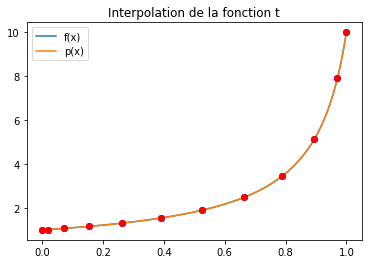

Norme de l'erreur :  n2 = 0.02804110132830474  ; ninf =  0.0097004035940218 

ftheta : [ 1.70765251e-11 -7.47492346e-14 -9.54097912e-14  2.29760655e-13
 -1.79201098e-12  1.79329815e-12 -2.29996577e-13  9.58400026e-14
  7.50718931e-14 -1.70764791e-11]


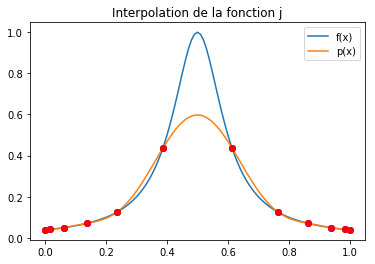

Norme de l'erreur :  n2 = 1.1855628449167952  ; ninf =  0.40245477202756397 

ftheta : [ 4.70880132e-09 -8.33339736e-09  4.78409742e-11  5.96181993e-11
 -1.79089854e-10  1.67013232e-08  1.81260688e-09 -1.10142444e-09
  7.81012477e-11 -1.83397315e-09]


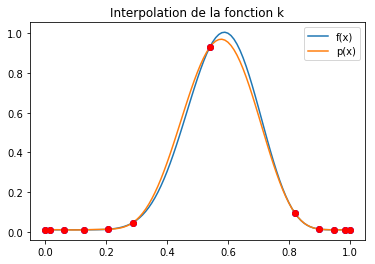

Norme de l'erreur :  n2 = 0.25680998227661084  ; ninf =  0.05620344206935479 

ftheta : [ 3.18233135e-07 -1.97627321e-06  5.50503560e-06  3.76306406e-06
 -2.92540488e-06  2.92540488e-06 -3.76306406e-06 -5.50503560e-06
  1.97627321e-06 -3.18233135e-07]


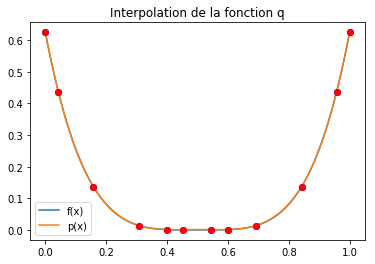

Norme de l'erreur :  n2 = 0.009977354706636792  ; ninf =  0.0020331077617014026 

ftheta : [-2.64637270e-12 -3.16857651e-13  3.78919118e-13 -7.83928478e-13
 -9.24282872e-12  9.24976762e-12  7.77600206e-13 -3.75866005e-13
  3.16358051e-13  2.64799294e-12]


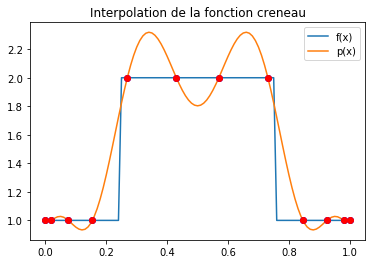

Norme de l'erreur :  n2 = 2.257698847671032  ; ninf =  0.7229666904494958 

ftheta : [ 8.09434811e-12 -4.01792488e-12  2.05613304e-13 -5.21804822e-15
  1.68753900e-14  4.51227944e-12 -2.06168416e-13  2.13717932e-15
 -1.27675648e-15 -2.22044605e-16]


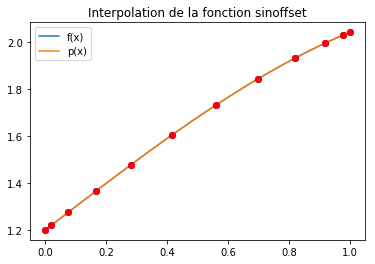

Norme de l'erreur :  n2 = 8.024386044344146e-15  ; ninf =  2.220446049250313e-15 

ftheta : [ 0.00157355 -0.00058503  0.00042566 -0.00012373  0.00013403 -0.00013403
  0.00012373 -0.00042566  0.00058503 -0.00157355]


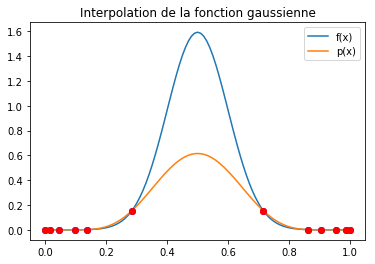

Norme de l'erreur :  n2 = 3.7949881462658985  ; ninf =  0.9763357841055573 



In [356]:
h = 1
p = 5
epsilon=0.001

for fonctions in fonctions_test : 
    px,fx = test_approx(p,fonctions,h,epsilon)
    print("Norme de l'erreur :  n2 =", npl.norm(px-fx), " ; ninf = ", npl.norm(px-fx,np.inf),"\n")

# Tests

### Variation de p

ftheta : [-0.00592901  0.00166908  0.02494199 -0.1676765 ]


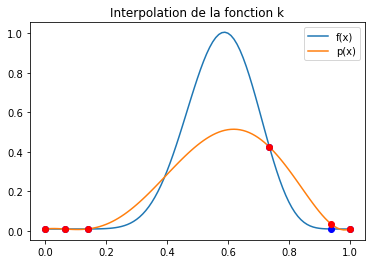

ftheta : [-2.13334457e-08  1.44759037e-09  4.41278775e-09 -2.01507921e-10
  1.26663926e-03 -1.36439211e-03  4.13997251e-03 -1.03162406e-02]


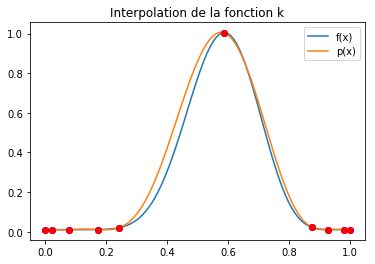

ftheta : [-7.04278710e-09  1.13236569e-08  2.47470048e-11 -2.97449843e-11
  1.25552346e-11 -2.39095521e-10 -4.74721958e-09  9.82172861e-10
 -1.59058482e-10  5.80590714e-11 -2.09927908e-12 -1.81923332e-09]


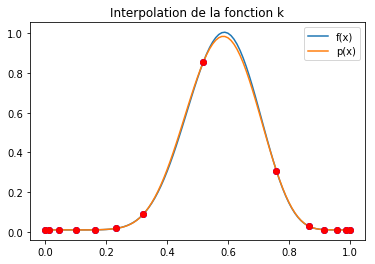

ftheta : [-6.95533174e-09  1.78089546e-08 -5.91993140e-09  2.09854703e-13
 -1.74860126e-15  3.16413562e-15  9.00612918e-13 -2.44835408e-09
 -1.99918281e-08  8.20013196e-09 -7.02755562e-12  3.09474668e-15
 -8.74300632e-16 -1.88633831e-14  1.92179605e-09 -3.11436843e-09]


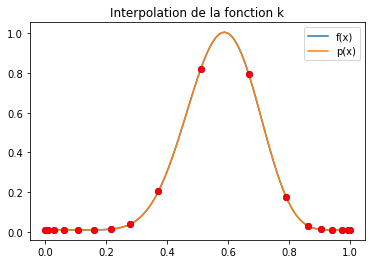

ftheta : [-2.66816097e-08  7.70308959e-08 -9.52781211e-08  7.02529669e-09
 -3.11799198e-14  1.45716772e-15  4.80171458e-15 -5.47201173e-14
  4.29822619e-09 -4.55056933e-08 -1.45861479e-07  1.10223429e-07
 -2.38423370e-08  4.98418147e-12 -7.77364284e-14  3.65540931e-14
 -2.72837308e-14 -5.59749198e-10  3.11410065e-08 -1.72036551e-08]


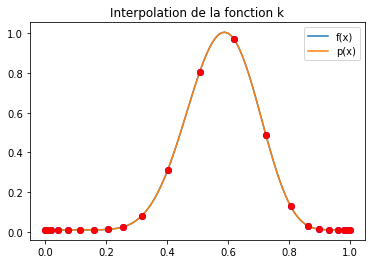

ftheta : [-3.61936729e-08  1.07844357e-07 -1.66716272e-07  1.15936630e-07
 -1.43530357e-09  4.06029377e-14 -9.97812943e-15 -7.93809463e-15
  4.54913884e-14 -1.87374477e-10  5.30836983e-08 -1.31691597e-07
 -2.85145762e-07  2.52636740e-07 -1.61784659e-07  1.07673888e-08
 -1.08635843e-12  1.86121951e-13 -1.00343345e-13  6.61276589e-14
  4.00852615e-12 -2.05845143e-08  6.66689379e-08 -2.77475364e-08]


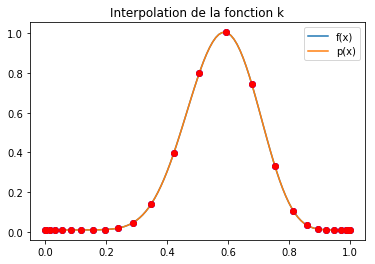

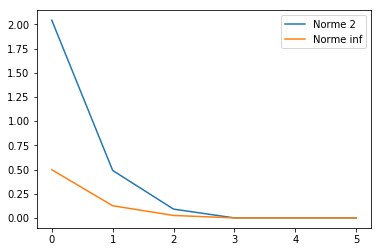

In [339]:
h = 1
epsilon=0.001
p = [2,4,6,8,10,12]
Err = np.zeros((2,len(p)))

for i in range(len(p)):
    px,fx = test_approx(p[i],k,h,epsilon)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
plt.plot(Err[0,:],label="Norme 2")
plt.plot(Err[1,:],label="Norme inf")
plt.legend()

### Variation de h

ftheta : [4.88498131e-14 5.65103520e-14]


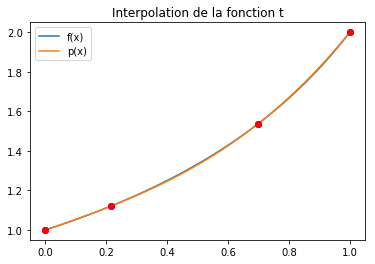

ftheta : [1.11022302e-15 3.33066907e-15]


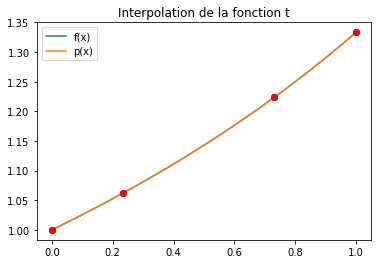

ftheta : [3.44169138e-15 1.23234756e-14]


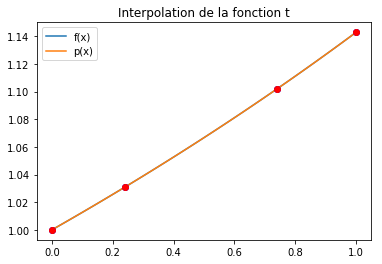

ftheta : [ 0.00000000e+00 -3.33066907e-16]


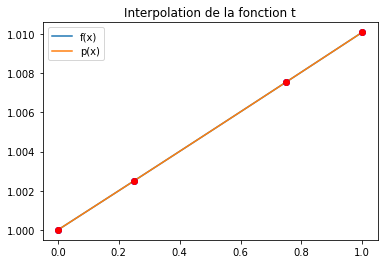

ftheta : [0.00000000e+00 2.22044605e-16]


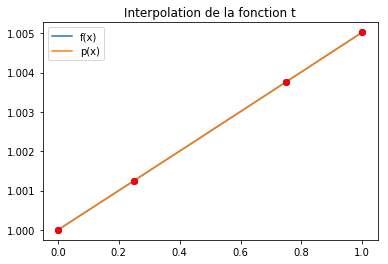

ftheta : [1.11022302e-16 1.11022302e-16]


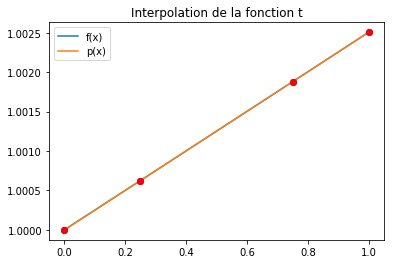

ftheta : [0. 0.]


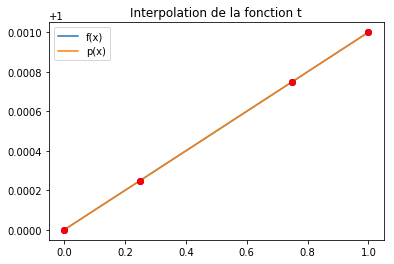

ftheta : [0.00000000e+00 2.22044605e-16]


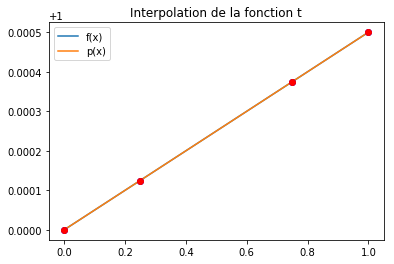

ftheta : [0.00000000e+00 1.11022302e-16]


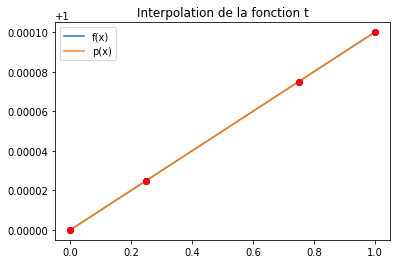

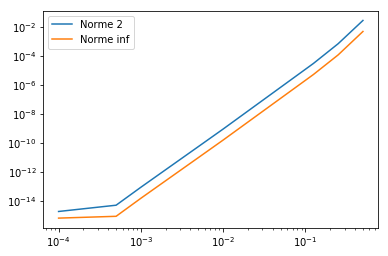

In [340]:
h = [1/2,1/4,1/8,1/100,1/200,1/400,1/1000,1/2000,1/10000]
p = 1
epsilon=0.001
Err = np.zeros((2,len(h)))

for i in range(len(h)):
    px,fx = test_approx(p,t,h[i],epsilon)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
plt.loglog(h,Err[0,:],label="Norme 2")
plt.loglog(h,Err[1,:],label="Norme inf")
plt.legend()

### Fonction négative en partie

In [341]:
def q(x,h,l):
    x = x*h
    return 10 * (x-1/2)**4 + l

In [342]:
def Jp(p,f,h,arg,X,epsilon):
    i = np.linspace(0,p-1,p)
    theta_i = 2*(p-i)*np.pi/(2*p+1)
    D_alpha = 2*p*np.cos(p*theta_i)/(np.cos(theta_i)-1) + np.sin(p*theta_i)/np.sin(theta_i) * 2 * (p - 1/(np.cos(theta_i)-1))
    
    i = np.linspace(1,p,p)
    eta_i = (2*(p-i)+1)*np.pi/(2*p+1)
    D_beta = 2*p*np.cos(p*eta_i)/(np.cos(eta_i)+1) + np.sin(p*eta_i)/np.sin(eta_i) * 2* (p + 1/(np.cos(eta_i)+1))

    feps = max( np.max(f(X,h,arg)),epsilon)
    return  np.sqrt(feps) * sps.diags(np.concatenate((D_alpha,D_beta))).toarray()

def b_beta (p,f,h,arg,beta,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(beta[i],h,arg),epsilon)/(1-beta[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - beta[j])/(beta[i]-beta[j])
        somme *= pro
        res  += somme
    return res
  

def a_alpha (p,f,h,arg,alpha,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(alpha[i],h,arg),epsilon)/(alpha[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - alpha[j])/(alpha[i]-alpha[j])
        somme *= pro
        res += somme
    return res
     
def f_theta(X,p,f,h,arg,espilon):
    alpha = X[:p]
    alpha_1 = np.concatenate((alpha,[1]))
    beta = X[p:]
    beta_0 = np.concatenate(([0],beta))
    return np.concatenate(( b_beta(p,f,h,arg,beta_0,alpha,epsilon), a_alpha(p,f,h,arg,alpha_1,beta,epsilon) ))

In [343]:
def Newton_Raphson (p,f,h,arg,epsi,epsilon,eps=1e-12,itermax=100):
    X = init_X(p) 
    X = np.concatenate((X[:p],X[p+2:]))
    k=0
    err=2*eps
    while err > eps and itermax > k :
        X0 = np.copy(X)
        #print(f_theta(X,p,f,h,epsilon))
        d = npl.solve(Jp(p,f,h,arg,X,epsilon),f_theta(X,p,f,h,arg,epsilon))
        X = X - d
        X = S(p,epsi,X)
        #print(f_theta(X,p,f,h,epsilon))
        k+=1
        err = npl.norm(X-X0)/npl.norm(X0)
    print(k)
    return X

In [344]:
def epsi_S(p):
    i = np.linspace(0,2*p+1,2*p+2)
    gamma = 1/2*(1-np.cos(i*np.pi/(2*p+1)))
    return min( 1/2/(p+1), np.min(gamma[1:]-gamma[:-1])/3)

def pn(x,ap,bp): 
    return x * ap**2 + (1-x) * bp**2
    
def approxh(x,p,f,h,arg,epsilon):
    epsi = epsi_S(p)
    #X = sco.fsolve(f_theta,np.array([1/4,3/4]), args=(p,f,h,epsilon))
    #X = S(p,epsi,X)
    X = Newton_Raphson(p,f,h,arg,epsi,epsilon)
    print("ftheta :",f_theta(X,p,f,h,arg,epsilon))
    X  = np.concatenate(( X[:p],[1],[0],X[p:]))

    ap = a_alpha(p,f,h,arg,X[:p+1],x,epsilon)
    bp = b_beta(p,f,h,arg,X[p+1:],x,epsilon)
    
    return pn(x,ap,bp),X

In [345]:
def test_approx(p,f,h,arg,espilon):
    x = np.linspace(0,1,101)
    px, interp = approxh(x,p,f,h,arg,epsilon)
   
    Ap = a_alpha(p,f,h,arg,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,arg,interp[p+1:],interp,epsilon)
    
    fx = f(x,h,arg) 
    plt.plot(x,fx,label="f(x)")
    plt.plot(x,px,label="p(x)")
    plt.plot(interp,f(interp,h,arg),'ob')
    plt.plot(interp, pn(interp,Ap,Bp),'or')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    
    return px,fx

28
ftheta : [-6.32827124e-15  2.18713936e-14  4.98767694e-12 -4.98685815e-12
 -2.18436380e-14  6.05071548e-15]


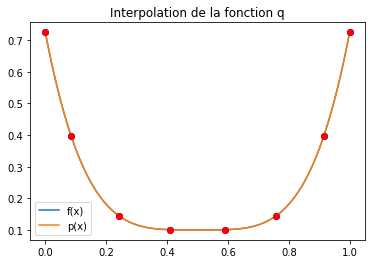

62
ftheta : [ 4.16333634e-17 -2.15105711e-16  4.62757610e-12 -4.62763855e-12
  3.19189120e-16  2.22044605e-16]


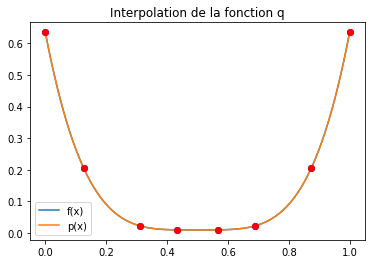

61
ftheta : [-9.58816360e-13  1.24471267e-12  2.35783615e-12 -2.35782227e-12
 -1.24455307e-12  9.58955138e-13]


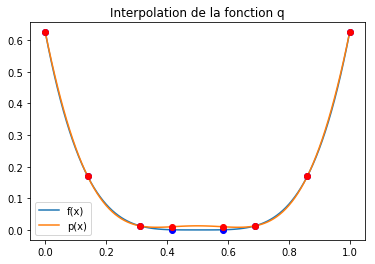

79
ftheta : [ 6.24986174e-13  2.12469625e-12  2.29830044e-12 -2.29826227e-12
 -2.12470319e-12 -6.24889029e-13]


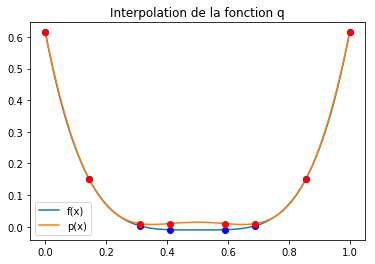

39
ftheta : [-2.68340905e-13  1.13964393e-13 -1.22499233e-12  1.22507560e-12
 -1.13978271e-13  2.68507439e-13]


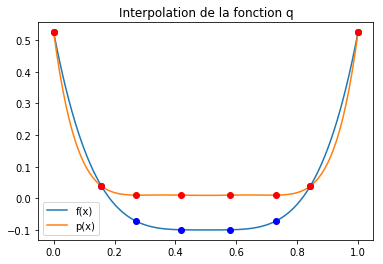

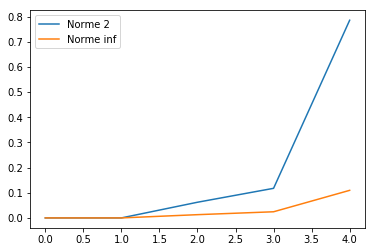

In [346]:
h = 1
p = 3
epsilon=0.01
l = [0.1,0.01,0,-0.01,-0.1]
Err = np.zeros((2,len(l)))

for i in range(len(l)):
    px,fx = test_approx(p,q,h,l[i],epsilon)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
plt.plot(Err[0,:],label="Norme 2")
plt.plot(Err[1,:],label="Norme inf")
plt.legend()

13
ftheta : [-2.46024772e-12  1.24496767e-12 -4.30627756e-14 -1.66533454e-16
  2.77555756e-17  7.07767178e-16  1.33226763e-15 -1.36002321e-15
  2.20601315e-13 -4.29123403e-12 -4.29847130e-12  2.19126800e-13
 -1.62023173e-15  1.04083409e-17  8.32667268e-16  5.89805982e-16
  3.46944695e-16 -4.27852198e-14  1.24601718e-12 -2.45792275e-12]


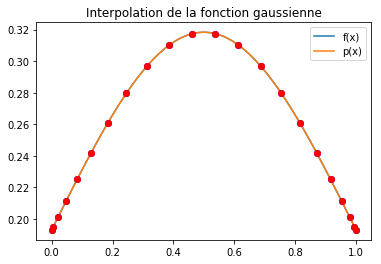

57
ftheta : [-1.61506863e-10  1.35828120e-11 -2.40779618e-15  1.59594560e-16
 -5.27355937e-16 -8.18789481e-16  5.82867088e-16 -2.77555756e-15
  2.51465515e-14 -2.02167172e-11 -2.02196315e-11  2.31880487e-14
  6.07153217e-16  3.53883589e-16  1.11716192e-15 -3.60822483e-16
  3.12250226e-16 -3.19189120e-15  1.35820938e-11 -1.61506711e-10]


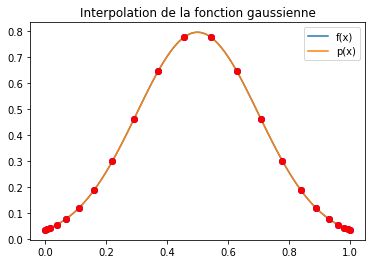

100
ftheta : [-1.31972835e-07  3.75006390e-07 -4.42867045e-07  4.94909963e-09
 -1.65232904e-09  2.90229712e-09 -3.71515095e-09  1.40597055e-08
  4.42093479e-07 -6.93012192e-07 -6.93012186e-07  4.42093480e-07
  1.40597046e-08 -3.71515105e-09  2.90229626e-09 -1.65232843e-09
  4.94909949e-09 -4.42867044e-07  3.75006389e-07 -1.31972832e-07]


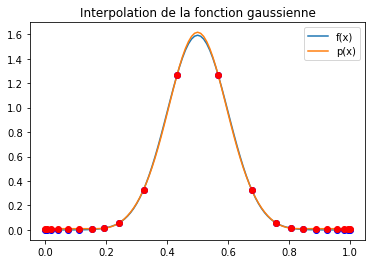

KeyboardInterrupt: 

In [347]:
def gaussienne(x,h,sigma):
    x = x*h
    m = 1/2
    #sigma = 1/10
    return np.exp(-(x-m)**2/2/sigma**2) / (2*np.pi)/sigma

h = 1
p = [10,10,10,20,100,500]
epsilon=0.01
l = [1/2,1/5,1/10,1/20,1/100,1/1000]
Err = np.zeros((2,len(l)))

for i in range(len(l)):
    px,fx = test_approx(p[i],gaussienne,h,l[i],epsilon)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
#plt.plot(Err[0,:],label="Norme 2")
#plt.plot(Err[1,:],label="Norme inf")
#plt.legend()